In [1]:
import pandas as pd
df = pd.read_csv('Moroccan All Shares - Données Historiques.csv')
df.head()

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
0,24/01/2022,"13.753,50","13.783,81","13.815,59","13.753,05",NaN,"-0,22%"
1,21/01/2022,"13.783,81","13.777,59","13.812,43","13.769,84",NaN,"0,05%"
2,20/01/2022,"13.777,59","13.737,71","13.814,82","13.734,73",NaN,"0,29%"
3,19/01/2022,"13.737,71","13.768,05","13.817,94","13.734,76",NaN,"-0,22%"
4,18/01/2022,"13.768,05","13.770,78","13.815,37","13.767,98",NaN,"-0,02%"


In [2]:
def convert_num(x):
    x = x.replace(" ", "")
    x = x.replace(".", "")
    x = x.replace(",", ".")
    return float(x)
def pct_to_num(x):
    x = x.replace(" ", "")
    x = x.replace(",", ".")
    x = x.replace("%", "")
    return float(x)

    

In [3]:

df.loc[:, ~df.columns.isin(["Date", "Variation %","Vol."])] = df.loc[:, ~df.columns.isin(["Date", "Variation %","Vol."])].applymap(convert_num)

In [4]:
df["Variation %"] = df["Variation %"].apply(pct_to_num)

In [5]:
df

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
0,24/01/2022,13753.50,13783.81,13815.59,13753.05,NaN,-0.22
1,21/01/2022,13783.81,13777.59,13812.43,13769.84,NaN,0.05
2,20/01/2022,13777.59,13737.71,13814.82,13734.73,NaN,0.29
3,19/01/2022,13737.71,13768.05,13817.94,13734.76,NaN,-0.22
4,18/01/2022,13768.05,13770.78,13815.37,13767.98,NaN,-0.02
...,...,...,...,...,...,...,...
4994,09/01/2002,3644.19,3637.89,3645.03,3627.77,NaN,0.07
4995,08/01/2002,3641.65,3655.56,3657.54,3639.32,NaN,-0.70
4996,07/01/2002,3667.30,3670.56,3674.71,3662.56,NaN,-0.11
4997,04/01/2002,3671.50,3641.08,3671.50,3640.00,NaN,0.87


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np

# Préparer les données
# Supposons que df est un dataframe contenant les données historiques
# avec les colonnes suivantes: Date, Dernier, Ouv., Plus Haut, Plus Bas, Vol., Variation %
# On va utiliser les 5 dernières observations comme entrées du modèle
# et prédire le cours Dernier à la prochaine date

# Convertir les données en numpy arrays
X = df[['Dernier','Ouv.',' Plus Haut', 'Plus Bas']].to_numpy()
y = df["Dernier"].to_numpy()

# Normaliser les données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

# Créer des séquences de données
# Chaque séquence contient 5 observations consécutives (timesteps) comme entrée
# et le cours Dernier à la prochaine observation comme sortie
X_seq = []
y_seq = []
timesteps = 5
for i in range(timesteps, len(X)):
  X_seq.append(X[i-timesteps:i])
  y_seq.append(y[i])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Diviser les données en train et test sets
train_size = int(len(X_seq) * 0.95)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Définir le modèle RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=100, batch_size=30)

# Faire des prédictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred) # Revenir à l'échelle originale



2023-05-30 17:21:57.906401: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
159/159 [==============================] - 12s 18ms/step - loss: 0.0271
Epoch 2/100
159/159 [==============================] - 3s 18ms/step - loss: 0.0043
Epoch 3/100
159/159 [==============================] - 3s 17ms/step - loss: 0.0034
Epoch 4/100
159/159 [==============================] - 2s 15ms/step - loss: 0.0032
Epoch 5/100
159/159 [==============================] - 4s 22ms/step - loss: 0.0027
Epoch 6/100
159/159 [==============================] - 4s 28ms/step - loss: 0.0027
Epoch 7/100
159/159 [==============================] - 5s 31ms/step - loss: 0.0024
Epoch 8/100
159/159 [==============================] - 6s 35ms/step - loss: 0.0023
Epoch 9/100
159/159 [==============================] - 5s 32ms/step - loss: 0.0023
Epoch 10/100
159/159 [==============================] - 4s 28ms/step - loss: 0.0019
Epoch 11/100
159/159 [==============================] - 3s 20ms/step - loss: 0.0019
Epoch 12/100
159/159 [==============================] - 3s 21ms/step - loss: 0.0018


In [95]:
# fine tune the model
# from scikeras.wrappers import KerasRegressor, KerasClassifier


# def create_model(optimizer='adam', units=50, dropout=0.2):
#   model = Sequential()
#   model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#   model.add(Dropout(dropout))
#   model.add(LSTM(units=units, return_sequences=True))
#   model.add(Dropout(dropout))
#   model.add(LSTM(units=units))
#   model.add(Dropout(dropout))
#   model.add(Dense(units=1))
#   model.compile(optimizer=optimizer, loss='mean_squared_error')
#   return model

# model = KerasRegressor(model=create_model,dropout=0.0,units=10)



In [96]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
grid = {
  'batch_size': [10, 20, 40, 60, 80, 100],
  'epochs': [10, 50, 100],
  'optimizer': ['adam', 'rmsprop', 'sgd'],
  'units': [10, 20, 50, 100],
  'dropout': [0.0, 0.1, 0.2, 0.3]
}
# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1)
# Fit the grid search
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_


2023-05-29 11:55:17.950742: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 11:55:17.950760: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 11:55:17.950760: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
320/320 [==============================] - 31s 36ms/step - loss: 0.0332
Epoch 2/10
320/320 [==============================] - 31s 36ms/step - loss: 0.0340
Epoch 2/10
320/320 [==============================] - 31s 36ms/step - loss: 0.0404
Epoch 2/10
320/320 [==============================] - 31s 36ms/step - loss: 0.0319
Epoch 2/10
320/320 [==============================] - 9s 29ms/step - loss: 2.4929e-04
Epoch 3/10
320/320 [==============================] - 9s 29ms/step - loss: 2.3819e-04
Epoch 3/10
320/320 [==============================] - 9s 29ms/step - loss: 2.3995e-04
Epoch 3/10
320/320 [==============================] - 10s 30ms/step - loss: 2.6219e-04
Epoch 3/10
320/320 [==============================] - 11s 33ms/step - loss: 2.3399e-04
Epoch 4/10
320/320 [==============================] - 11s 33ms/step - loss: 2.4039e-04
Epoch 4/10
320/320 [==============================] - 11s 33ms/step - loss: 2.2927e-04
Epoch 4/10
320/320 [=========

KeyboardInterrupt: 

320/320 [==============================] - 27s 85ms/step - loss: 5.2655e-05
Epoch 43/100
320/320 [==============================] - 26s 83ms/step - loss: 2.0687e-04
Epoch 22/100
 38/320 [==>...........................] - ETA: 10s - loss: 1.6126e-04

In [76]:
df.shape

(4999, 7)

In [7]:
# Évaluer le modèle
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_pred))
print('RMSE: ', rmse)

RMSE:  162.16199021824792


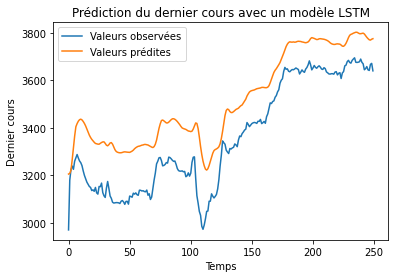

In [8]:
import matplotlib.pyplot as plt

# Tracer les valeurs observées et prédites
plt.plot(scaler.inverse_transform(y_test), label='Valeurs observées')
plt.plot(y_pred, label='Valeurs prédites')
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Dernier cours')
plt.title('Prédiction du dernier cours avec un modèle LSTM')
plt.show()
